In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [2]:
import yfinance as yf

In [3]:
df = yf.download('BTC-USD', start = "2014-04-17", end = "2022-07-27")

[*********************100%***********************]  1 of 1 completed


In [4]:
df.rename(columns = {"Adj Close": "Adjusted_Close"}, 
          inplace = True)

In [5]:
df.head()

,Open,High,Low,Close,Adjusted_Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [6]:
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

### Monthly Averages.

In [7]:
df_month

,Open,High,Low,Close,Adjusted_Close,Volume
Date,,,,,,
2014-09-30,412.654003,421.104422,398.174641,407.182428,407.182428,2.934864e+07
2014-10-31,365.748000,374.314260,354.856645,364.148873,364.148873,2.912885e+07
2014-11-30,364.850235,376.494235,357.241831,366.099799,366.099799,2.199111e+07
2014-12-31,343.074836,347.487129,336.565775,341.267871,341.267871,1.784201e+07
2015-01-31,251.799905,261.391583,240.495550,248.782547,248.782547,3.544555e+07
...,...,...,...,...,...,...
2022-03-31,41889.148438,42770.031502,41120.731729,41966.237525,41966.237525,2.680464e+10
2022-04-30,41694.653646,42328.085156,40805.150260,41435.319661,41435.319661,2.767053e+10
2022-05-31,31900.711127,32629.598349,30905.249244,31706.105217,31706.105217,3.566740e+10


### Yearly Averages.

In [8]:
df_year

,Open,High,Low,Close,Adjusted_Close,Volume
Date,,,,,,
2014-12-31,365.058217,373.265397,355.903726,363.693085,363.693085,2.383690e+07
2015-12-31,272.149011,278.151978,266.807891,272.453381,272.453381,3.390557e+07
2016-12-31,567.141429,574.302273,560.453374,568.492407,568.492407,8.592451e+07
2017-12-31,3970.644848,4144.687445,3811.707792,4006.033629,4006.033629,2.382867e+09
2018-12-31,7601.018680,7787.978969,7350.747939,7572.298947,7572.298947,6.063552e+09
2019-12-31,7385.218456,7549.907409,7222.602867,7395.246282,7395.246282,1.673049e+10
2020-12-31,11056.787201,11304.359035,10844.595163,11116.378092,11116.378092,3.302327e+10
2021-12-31,47402.115662,48762.998924,45852.003082,47436.932021,47436.932021,4.715574e+10
2022-12-31,35021.649324,35734.087457,34108.382416,34900.878472,34900.878472,2.924650e+10


### Quarterly Averages.

In [9]:
df_Q.head(10)

,Open,High,Low,Close,Adjusted_Close,Volume
Date,,,,,,
2014-09-30,412.654003,421.104422,398.174641,407.182428,407.182428,2.934864e+07
2014-12-31,357.815380,365.985545,349.471195,357.075141,357.075141,2.299815e+07
2015-03-31,251.916000,259.438223,244.334134,251.209678,251.209678,3.077143e+07
2015-06-30,236.610099,239.549252,233.911967,236.858308,236.858308,2.055210e+07
2015-09-30,255.345435,259.317675,251.395902,254.859673,254.859673,2.726857e+07
2015-12-31,343.898370,353.476347,336.743436,346.037141,346.037141,5.681688e+07
2016-03-31,410.977385,415.911737,405.155463,410.728769,410.728769,6.813156e+07
2016-06-30,509.860791,519.658900,501.586396,512.492754,512.492754,9.665506e+07
2016-09-30,616.403697,621.740532,609.719248,615.702601,615.702601,8.853052e+07


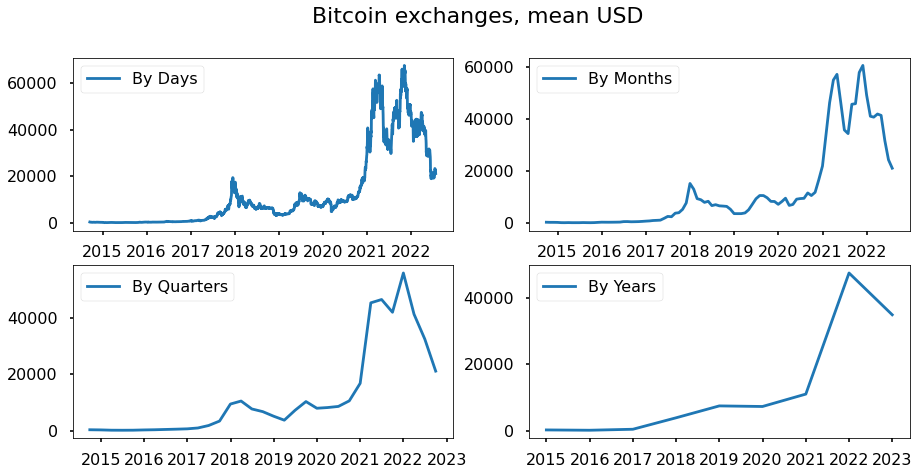

In [10]:
# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df.Adjusted_Close, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Adjusted_Close, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Adjusted_Close, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Adjusted_Close, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()


# Stationarity check and decomposition Plot of the series

Dickey–Fuller test: p=0.535646


<Figure size 1080x504 with 0 Axes>

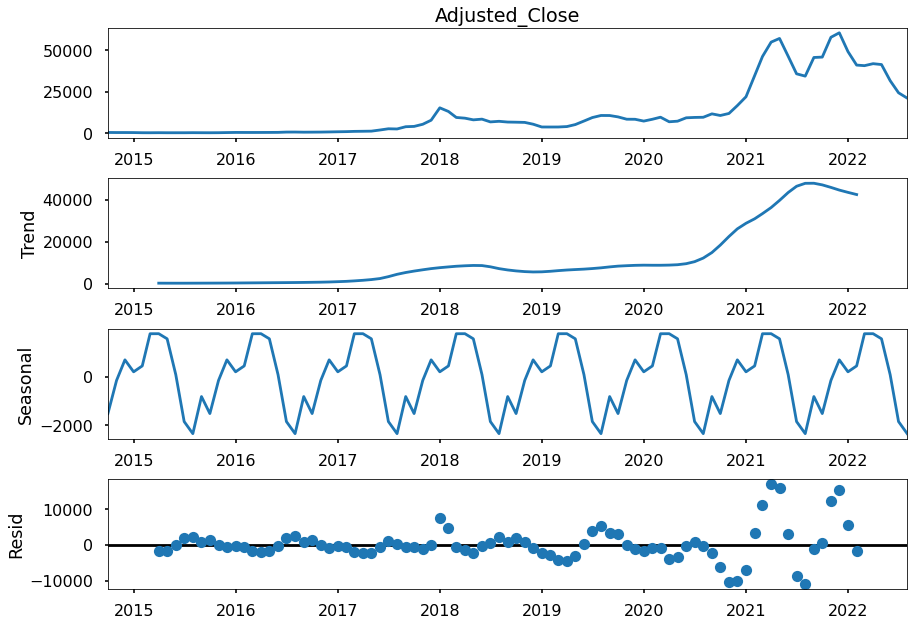

In [11]:
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(df_month.Adjusted_Close).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Adjusted_Close)[1])
plt.show()

In [12]:
# Box-Cox Transformations
df_month['Adjusted_Close_box'], lmbda = stats.boxcox(df_month.Adjusted_Close)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Adjusted_Close)[1])

Dickey–Fuller test: p=0.535646


In [13]:
# Seasonal differentiation
df_month['prices_box_diff'] = df_month.Adjusted_Close_box - df_month.Adjusted_Close_box.shift(12)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff[12:])[1])

Dickey–Fuller test: p=0.109896


Dickey–Fuller test: p=0.000005


<Figure size 1080x504 with 0 Axes>

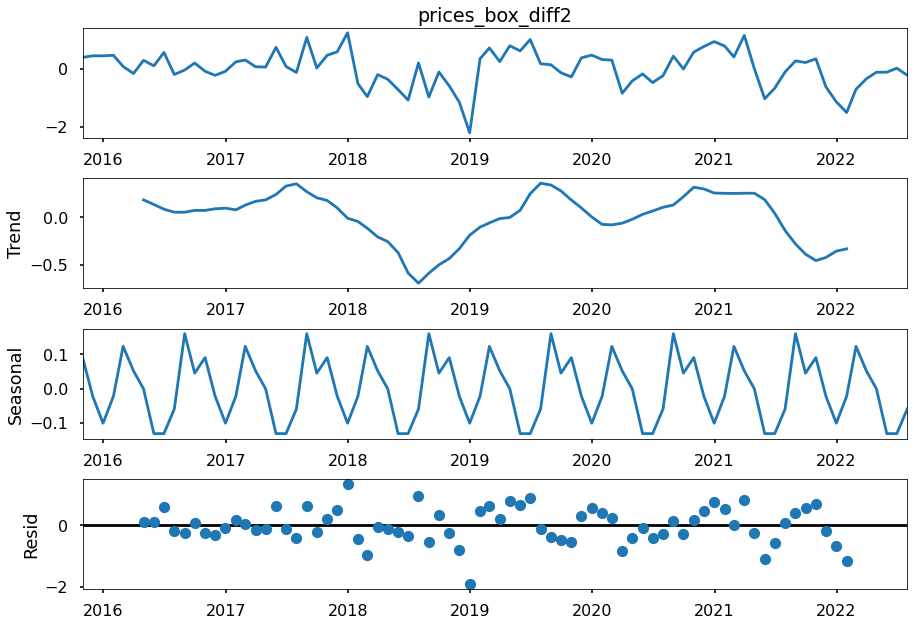

In [14]:
# Regular differentiation
df_month['prices_box_diff2'] = df_month.prices_box_diff - df_month.prices_box_diff.shift(1)
plt.figure(figsize=(15,7))

# STL-decomposition
sm.tsa.seasonal_decompose(df_month.prices_box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff2[13:])[1])

plt.show()

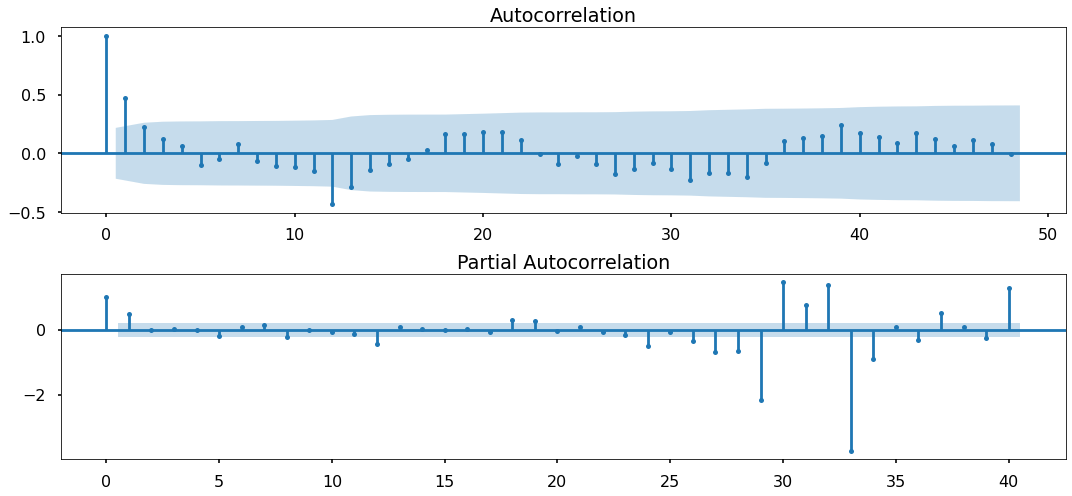

In [15]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.prices_box_diff2[13:].values.squeeze(), lags=48, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_month.prices_box_diff2[13:].values.squeeze(), lags=40, ax=ax)
plt.tight_layout()
plt.show()

In [16]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.Adjusted_Close_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [17]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
19  (1, 0, 0, 1)  106.845893
7   (0, 1, 0, 1)  107.928822
23  (1, 0, 2, 1)  108.015804
22  (1, 0, 2, 0)  108.570426
25  (1, 1, 0, 1)  108.588676
                                      SARIMAX Results                                       
Dep. Variable:                   Adjusted_Close_box   No. Observations:                   95
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                 -50.423
Date:                              Sat, 27 Aug 2022   AIC                            106.846
Time:                                      19:15:49   BIC                            114.066
Sample:                                  09-30-2014   HQIC                           109.745
                                       - 07-31-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---

Dickey–Fuller test:: p=0.000000


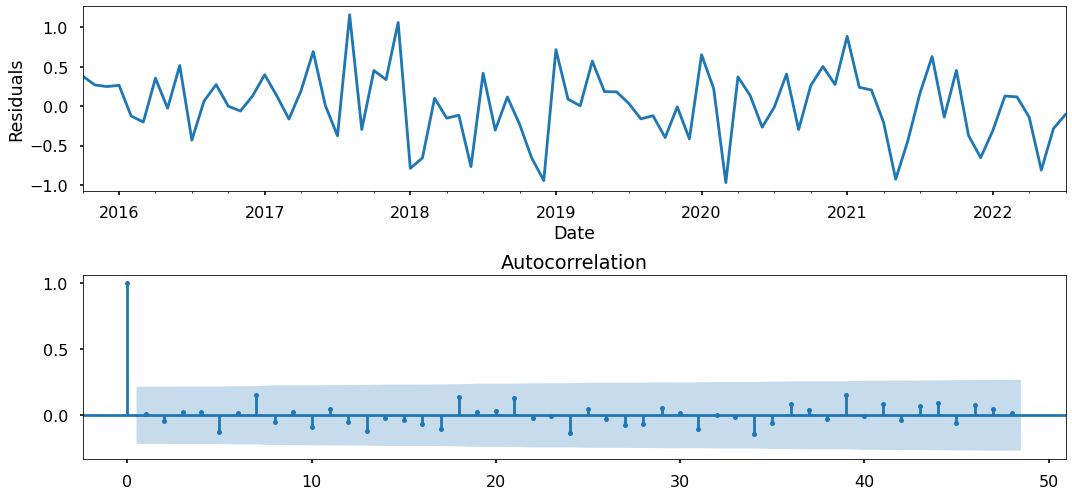

In [18]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

In [19]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

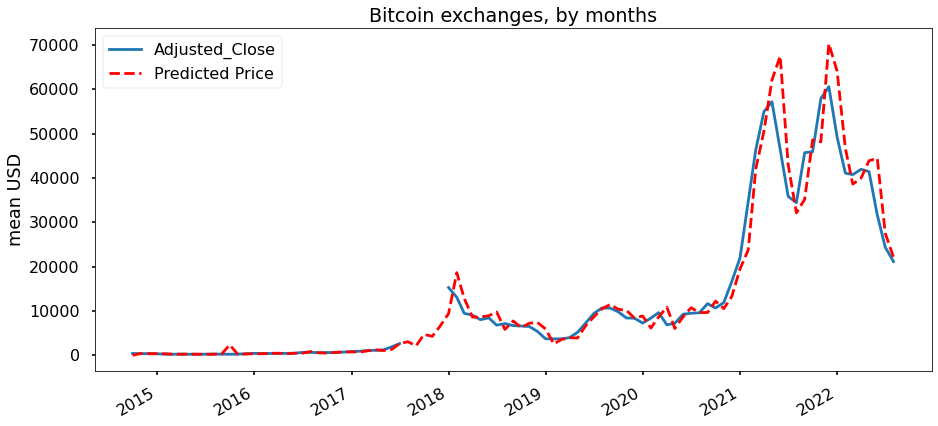

In [26]:
# Prediction
df_month2 = df_month[['Adjusted_Close']]
date_list = [datetime(2017, 6, 30), datetime(2017, 7, 31), datetime(2017, 8, 31), datetime(2017, 9, 30), 
             datetime(2017, 10, 31), datetime(2017, 11, 30), datetime(2017, 12, 31)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=150), lmbda)
plt.figure(figsize=(15,7))
df_month2.Adjusted_Close.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()


In [27]:
df_month2['forecast']

2014-09-30       1.000000
2014-10-31     407.182573
2014-11-30     364.148923
2014-12-31     366.099821
2015-01-31     341.267876
                 ...     
2017-08-31    2132.547406
2017-09-30    4710.264434
2017-10-31    4283.065922
2017-11-30    6648.812086
2017-12-31    9391.956879
Name: forecast, Length: 102, dtype: float64

In [30]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [31]:
# Using MAPE error metrics to check for the error rate and accuracy level
LR_MAPE= MAPE(df_month2['Adjusted_Close'],df_month2['forecast'])
print("MAPE: ",LR_MAPE)

MAPE:  26.231678843660927
